# Youth Perception of Sexual Education in India
****

For my project, I have chosen to analyze data from a survey I conducted in May 2020 with the goal of discerning what the youth of India thinks about the Indian Sexual Education curriculum. While India continues to make phenomenal progress in global fields, there is one particular platform in which it still lacks direction and growth - Education, particularly **Sexual Education (Sex Ed)**. While countries like USA have State specific laws that target the implementation of Sex Ed in schools, until very recently, India was still debating the merits of including it in the curriculum at all. A recent Instagram scandal in May 2020, termed the **'Bois Locker Room'** made headlines when a group of adolescent boys were outed by their classmates for a group chat that perpetuated rape culture, objectification of women and criminal behaviours of morphing private photographs of women. While there are many nuances to this issue, it brought to the forefront the need to destigmatize sexual culture amongst teenagers and facilitate dialogue within the education systems on topics that are still considered taboo - topics such as safe sex, gender identity, attraction, consent etc. from more than a paltry biological point of view. 

The 'Bois Locker Room' event made me feel complicit to a system that deliberately denies students the tools to make well-adjusted choices about their lives and instead polices them morally, resulting in disastrous consequences. I've always thought that inculcating Sex Ed topics into a supportive and fact-based school curriculum would prevent the hazard of misformation that teenagers have to sift through everyday. In a study conducted by the Indian Ministry of Women and Child development in conjunction with UNICEF in 2007 showed that 53% of children in India faced sexual abuse of some kind and a majority of those went unreported. Academia has shown time and again that Sex Ed plays a major role in sexual violence prevention **CITATION**. Drawing from that, it is also my opinion that destigmatization and normalisation of sexual topics will lead to better adjusted adolescents who understand concepts of consent & safe sex and will eventually lead to lower sexual harassment cases or crimes. 

## Survey Parameters

The survey was conducted via Google forms and was anonymous. It was restricted to Indians in the age-group of 16-28. Any Board of educational curricula (International Baccalaureate, ICSE, IGCSE etc.) was accepted as long as the individual completed High School in India. The main question I ask in this survey, is the following:
_<h2><center>“What do the youth perceive sexual education in India as?”</center></h1>_
I picked this question given that the main goal of the research is to present it to Education Technology or Educational Reform instituitions in order to help curate a curriculum that caters to what the youth wants. I believe that the survey will indicate their disssatisfaction with the current curriculum. It's an ambitious question and to help break it down, I have organised the notebook into sections that correspond to different questions. Currently, the survey has 112 responses.

## Process 

### 1. Demographic Survey Data
- Analyse and visualise the demographic distribution of the participants in order contextualise findings and understand potential baises in the data set. For instance, is the sample representative of my target population of the youth of India? 

### 2. Perceptual and Curricular Data
- Out of a corpus of topics covering "taboo" topics directly or indirectly connected to Sex Ed, which topics were considered the most important by the participants?
- How often were these topics addressed by their school? 
- Have the participants experienced sexual policing by an authority figure in their schooling environment?

**Tools:** For both (1) and (2), I used the pandas library for data manipulation and matplotlib and seaborn libraries for visualising the results. 
### 3. Textual Analysis of Free Response Data
- Extract topics from the answers of the free response question in the survey 

    **Workflow**:
    1. Text-preprocessing by removing punctuations and stopwards as well as tokenization.
    2. Analysing word frequencies and visualising them using Wordcloud and Barplots. 
    3. Using the scikit-learn libary (TfidfVectorizer) to create the Document-Term Matrix
    4. Fitting it to a LDA model
    5. Visualising extracted topics using pyLDAvis
    6. Analysing the contextual similarity of the words using a Word2Vec model
    7. Interpreting that using a combination of Principle Component Analysis (PCA) and T-distributed stochastic neighbor embedding (TSNE).

In [31]:
#!pip install pyLDAvis
#!pip install wordcloud
from collections import Counter
import gensim
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.corpus import movie_reviews
import numpy as np
import os
import pandas as pd
import pyLDAvis.sklearn
import re
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.manifold import TSNE
import spacy
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
# Where am I?
%pwd

'/Users/anushasubramanian/Desktop/Project101'

In [12]:
survey = pd.read_csv("Education_survey.csv")
del survey["Add Comments"]

# DEMOGRAPHIC SURVEY DATA
***
With the aim of understanding the distribution of participants and putting the data in context of accessible services, belief systems, and how representative the sample is. It is particularly relevent in a county such as India where pockets of rural and urbanism co-exist.

## Age & High School City of Participants

- Age: Current Age

- High School City: The city they graduated high school from. 

In [32]:
#extract unique age data from survey
age = dict(survey["Age"].value_counts())
age_df = pd.DataFrame()
age_df["age"] = age.keys()
age_df["frequency"] = age.values()

#extract and clean location data 
city = dict(survey["High School City"].value_counts())
city["Dehradun"] = city["Dehradun "] + city["Calcutta, Dehradun "] + city["Doon"]
del city["Dehradun "], city["Calcutta, Dehradun "], city["Doon"]
city_df = pd.DataFrame()
city_df["City"] = city.keys()
city_df["Frequency"] = city.values()

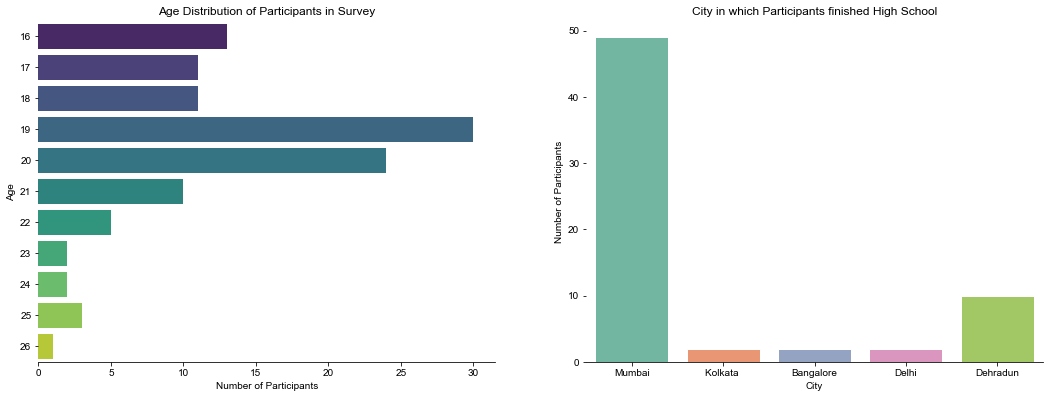

In [33]:
f, axes = plt.subplots(1, 2, figsize =(18,6.27))
                      
#plot age data
#sns.set(rc={'figure.figsize':(10,6.27)})
age_barplot = sns.barplot(x = "frequency", 
                         y = "age", 
                         data = age_df, 
                         orient = "h", palette = 'viridis', ax = axes[0])

age_barplot.set(xlabel = "Number of Participants", ylabel = "Age", title = "Age Distribution of Participants in Survey");

#plot location data
sns.set(rc={'figure.figsize':(10,6.27)})
city_barplot = sns.barplot(x = "City", 
                         y = "Frequency", 
                         data = city_df, 
                         orient = "v", palette = 'Set2', ax = axes[1])
city_barplot.set(xlabel = "City", ylabel = "Number of Participants", title = "City in which Participants finished High School");

sns.despine(left=True)

A large proportion of our participants are in the 19-20 age-group, which means that they very recently graduation from high school. Setting it in context, this was also approximately the age-group that was involved in the *Bois Lockeroom Scandal*.

An overwhelmingly large proportion of participants completed their schooling in Mumbai - a metropolitan city. Since I am from Mumbai, it is possible that the initial dissemination of the survey was largely to a Mumbai based population who them propagated it to their own Mumbai-based networks. I will discuss the limitations of this at the end of this project.  

## Gender Identity of Participants

Self-report measure of what gender they identify as. 

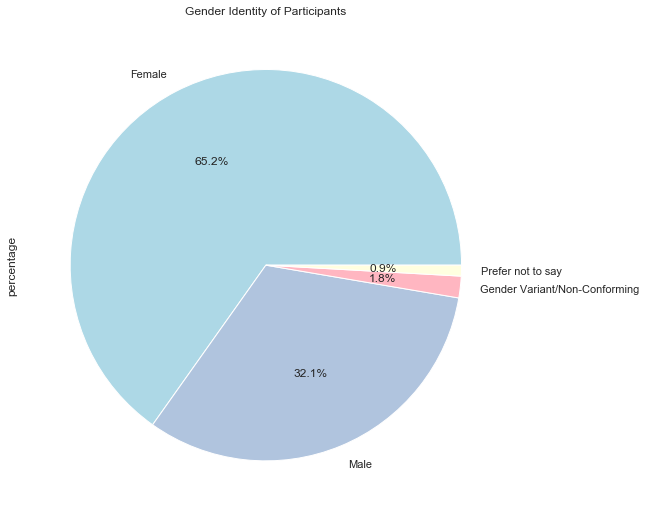

In [42]:
#extract gender data
gender_df = pd.DataFrame(index = ['Female','Male','Gender Variant/Non-Conforming', 'Prefer not to say'])
freq = list(survey["Gender Identity"].value_counts())
gender_df["percentage"] = freq

#plot gender pie chart
gender_pie = gender_df.plot.pie(y = "percentage", figsize = (9,9), autopct ='%1.1f%%',
                             colors = ["lightblue","lightsteelblue", "lightpink", "lightyellow"], legend = False);
plt.title("Gender Identity of Participants");


India is still fairly conservative when it comes to recognising non-binary gender identities. This could account for the very low proportion of such individuals in the sample. 

More than half the sample of participants identified as female. This could be due to disemination in gender-skewed networks (I sent them out to more females and they in turn sent it to more-oriented networks and so on), the tendency of particular genders to respond more actively to online surveys than others, or even the cultural need to conform to the binary (individuals who would categorize themselves as non-binary in private were hesitant to do so on a survey).

## Spectrum of Religious Affiliations

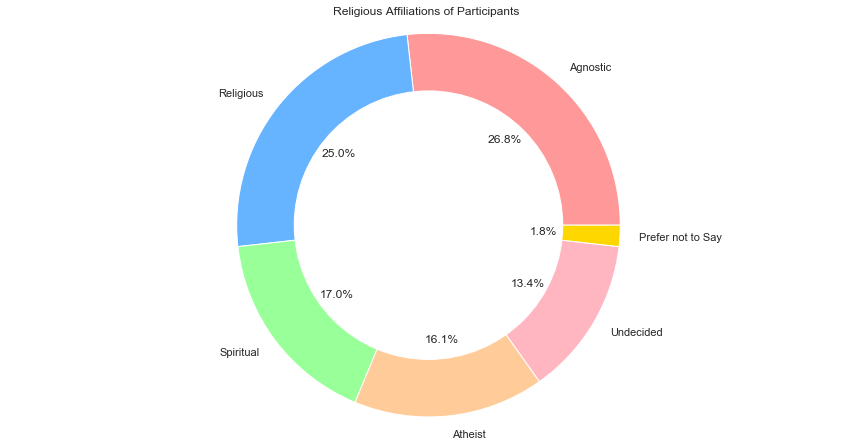

In [37]:
# Pie chart (MEDIUM ARTICLE)

religion = dict(survey["Religious Affiliation "].value_counts())

#Cleaning up repeat data in the survey 
religion["Undecided"] = religion["Still in the process of understanding concept of religion and god"] + religion["No clue "]
del religion["Still in the process of understanding concept of religion and god"], religion["No clue "]

#define variables for the pie-chart
sizes = list(religion.values())
labels = ["Agnostic","Religious","Spiritual","Atheist","Undecided","Prefer not to Say"]

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','lightpink',"gold"]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title("Religious Affiliations of Participants")
plt.tight_layout()
plt.show()

The youth sampled in this survey can be considered representative of the various religious modes of thought prevalent in India. **However, I would be careful to assume that they were representative of religions themselves since I didn't ask for particular religious ties such as Hinduism or Islam etc.LIMITATION**  

# PERCEPTUAL AND CURRICULAR SURVEY DATA
***

Students were asked to answer various forced-choice or rating questions regarding a list of topics relevent directly or indirectly to sexual education. The topics were descriptive because it is near impossible to encapsulate the range of concepts like "mental health" or "sexual health" under one umbrella term. However, to increase ease of understanding and readability of code, the descriptive topics have been shortened. A table of reference is provided below.

|Shortened Form |Description
|:-:|:-:
|svsh|Sexual/Domestic Violence and Identifying Workplace Harassment
|mental_health|Comprehensive Mental Health Awareness, Assessments & Resources
|bullying|Tackling Bullying & Identifying Toxic Environments
|sex_ed|Comprehensive Sex Education beyond basic reproduction (safe sex, consent, pleasure, desire)
|gender_identity|Gender Identity & Sexuality
|menstruation|Normalization of Menstruation
|cyber_crime|Comprehensive understanding of Cyber Etiquettes, Crimes, Laws

## Which topics were rated the highest in importance by the participants?

Participants were asked to rate the importance of including the topics listed above in their school curriculum, on a 0-5 point scale. I summed the individual scores obtained by each topic. The graph depicts the cumulative score out of 560.

In [35]:
#sum the columns
ratings = pd.DataFrame()
topics = ["svsh","mental_health","bullying","sex_ed","gender_identity","menstruation","cyber_crime"]
freq = [survey["Imp SVSH"].sum(),survey["Imp Mental Health"].sum(),survey["Imp Bullying"].sum(),survey["Imp Sex Ed"].sum(),
        survey["Imp Gender Identity "].sum(),survey["Imp Menstruation"].sum(),survey["Imp Cyber Crime"].sum()]
ratings["topics"] = topics
ratings["score"] = freq
ratings.sort_values(by = 'score', inplace = True, ascending = False)

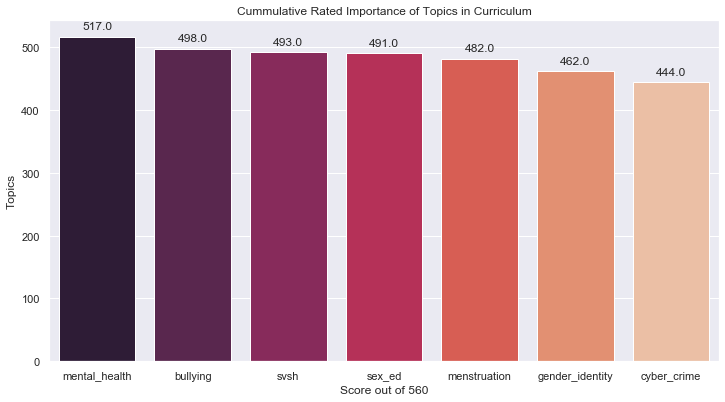

In [36]:
#plot barplot
sns.set(rc={'figure.figsize':(12,6.27)})
imp_barplot = sns.barplot(x = "topics", y = "score", data = ratings, palette = 'rocket', orient = "v");
imp_barplot.set(xlabel = "Score out of 560", ylabel = "Topics", 
                title ="Cummulative Rated Importance of Topics in Curriculum");
for p in imp_barplot.patches:
    imp_barplot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

I expected more variations than this graph depicts. Mental Health and Bullying are the two most important topics according to the participants. However, looking at how close in score the other topics are, it's not surprising because it is possible that a vast majority of teenage/adolescent mental health problems and incidents of bullying are manifestations of issues that arise from improper education and understanding of the topics that rank lower on the graph. Something that struck me as particularly interesting was that Cyber Crime ranked **last** on the list, even though the survey was conducted in the middle of an episode of national outrage regarding a _cyber space_ scandal. 

## According to the participants, how often were these topics address in their school?

Participants had to rate on a modified Likert Scale, how often the same topics were addressed in their schools. Oftentimes, Indian officials tout the excuse of the "public is not ready" or the "public doesn't want it" as way of brushing shortcomings aside. This question along with the previous one was incorporated to understand whether there existed a discrepancy between the desire of youth to gain information on taboo topics and the frequency in which such information was disseminated in the educational instituitions. 

**Scale**
1. Never
2. Rarely
3. Occasionally
4. Frequently
5. Very Frequently

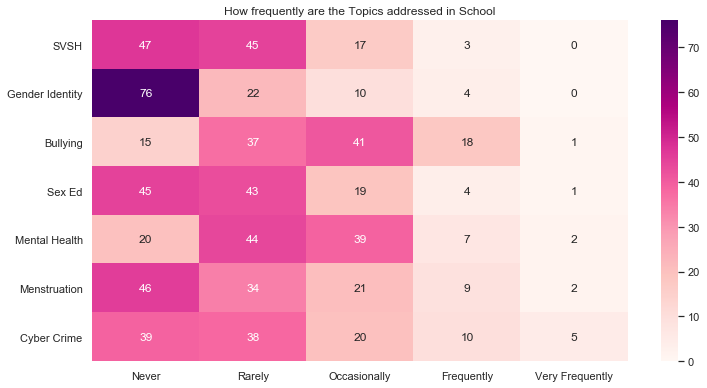

In [50]:
topics = ["SVSH", "Mental Health", "Bullying", "Sex Ed","Gender Identity", "Menstruation", "Cyber Crime"]
metric = ["Never","Rarely","Occasionally","Frequently","Very Frequently"]

#initialise DataFrame
matrix_df = pd.DataFrame(index = topics)

never,rarely, occasionally, freq, vfreq = [],[],[],[],[]

#column numbers we want to extract from survey
columns = [20,21,22,23,24,25,28]

#our data is not tidy. This loop is to create a frequency matrix of the form topicx x metrics
for i in columns:
    count = dict(survey[survey.columns[i]].value_counts())
    for j in metric:
        if j not in count.keys():
            count[j] = 0     
    never.append(count["Never"])
    rarely.append(count["Rarely"])
    occasionally.append(count["Occasionally"])
    freq.append(count["Frequently"])
    vfreq.append(count["Very Frequently"])

# add data to your DataFrame
matrix_df["Never"] = never 
matrix_df["Rarely"] = rarely 
matrix_df["Occasionally"] = occasionally
matrix_df["Frequently"] = freq
matrix_df["Very Frequently"] = vfreq
matrix_df.sort_values(by = "Very Frequently", inplace = True, ascending = True)
matrix_df

sns.heatmap(matrix_df,cmap = 'RdPu', annot=True);
plt.title("How frequently are the Topics addressed in School");

There's almost and even split in the heatmap with the right side dominated by light tones (corresponding to lower number of responses) while the left side is much darker (higher number of responses). Using the given scale to interpret the map, it is evident that very few participants felt that _any_ of these topics were addressed very frequently or frequently. 

76 participants felt that Gender Identity was Never addressed in their school - the highest vote in the heatmap. This makes sense given the Indian context. While the Indian landscape accepts the idea of sexual relations, albeit biologically, a large proportion of the country still has trouble with the idea of non-binary Gender identities. And since Education systems and curricula tend to run on a lag, not updating textbooks and details until decades after movement, educational resources about this topic are nearly non-existent in this conservative system.

## Have the participants experience sexual policing by an authority figure in their schooling environment?

Almost immediately after the 'Bois Locker room' scandal erupted on social media, a Tweet (now deleted) stating that some of the first experiences of casual sexism that people face, happen at the hands of teachers. It prompted viral retweets with people sharing their own experiences of being sexually policed (dresscode, asked not to be "distracting" etc.) in a school environment. I was intrigued by the respones and included this question to understand if this was a common experience.

Since the female identifying participants dominate the dataset, a simple barplot of responses would not allow for correct interpretation. The extremely high proportion of "Yes" versus the other responses could simply be a function of gender. To get a holistic picture, I plotted the responses in a gender specific manner in a grouped barplot.

Note: I only included the binary gender identities since the rest of the categories together comprised less than 3% of the total participant population.

In [53]:
#sorting based on gender and sexual policing
gen = survey.iloc[:,[2,29]]
yes = gen.loc[gen["Sexual Policing "] == "Yes"]
yes_dict = dict(yes["Gender Identity"].value_counts())

maybe = gen.loc[gen["Sexual Policing "] == "Maybe"]
m_dict = dict(maybe["Gender Identity"].value_counts())

no = gen.loc[gen["Sexual Policing "] == "No"]
no_dict = dict(no["Gender Identity"].value_counts())

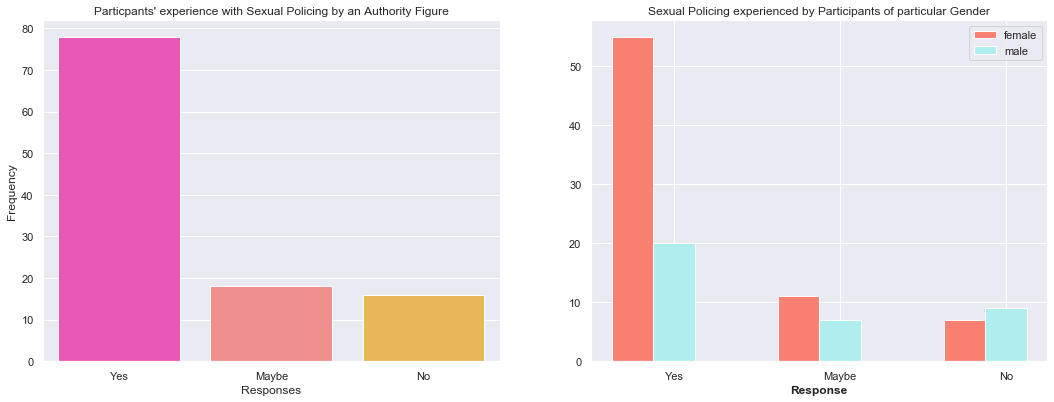

<Figure size 864x451.44 with 0 Axes>

In [58]:
f, axes = plt.subplots(1, 2, figsize =(18,6.27))
# plot raw sexual policing data
police_df = pd.DataFrame()
policing = dict(survey["Sexual Policing "].value_counts())
police_df["Responses"] = policing.keys()
police_df["Frequency"] = policing.values()
police_bar = sns.barplot(x = "Responses",y = "Frequency", data = police_df, orient = "v", palette = 'spring', ax = axes[0]);
police_bar.set(title = "Particpants' experience with Sexual Policing by an Authority Figure");

# plot gender specific data
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [yes_dict['Female'],m_dict['Female'],no_dict['Female']] #female
bars2 = [yes_dict['Male'],m_dict['Male'],no_dict['Male']] #male
#bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color ='salmon', width = barWidth,label='female');
plt.bar(r2, bars2, color ='paleturquoise', width = barWidth,label='male');
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3');
 
# Add xticks on the middle of the group bars
plt.xlabel('Response', fontweight='bold');
plt.xticks([r + barWidth for r in range(len(bars1))], ['Yes', 'Maybe', 'No']);
plt.title("Sexual Policing experienced by Participants of particular Gender");

# Create legend & Show graphic
plt.legend();
plt.show();

sns.despine(left=True);

# TEXUAL ANALYSIS ON FREE RESPONSE ANSWERS
***

## _Q: 'How do you think these topics were approached in your school environment?'_

what was the q
manual cleanup of data before hand

## Text Preprocessing

In [14]:
response = list(survey["Free Response"])
response[0:2]

['In India (Mumbai) it was introduced very briefly and done in a manner that boys and girls had separate trainings. This sort of defeated the point of normalizing sex related topics as we were not allowed to discuss it freely. In LA, these topics were more normalized (especially via mandatory trainings and online courses that had to be fulfilled prior to beginning freshman year courses).',
 'Being in an all-boys school, I think they took this pretty casually as it was so commonplace.']

In [15]:
#remove punctuations and save in new list
from string import punctuation
text_processed = []
for r in response:
    for char in punctuation:
        r = r.lower().replace(char,"")
    text_processed.append(r)
text_processed[0:2]

['in india mumbai it was introduced very briefly and done in a manner that boys and girls had separate trainings this sort of defeated the point of normalizing sex related topics as we were not allowed to discuss it freely in la these topics were more normalized especially via mandatory trainings and online courses that had to be fulfilled prior to beginning freshman year courses',
 'being in an allboys school i think they took this pretty casually as it was so commonplace']

In [16]:
#add the processed text to our dataframe for use later
survey["Text processed"] = text_processed

In [17]:
# Save the "Text_processed" list as one long string
long_string = ','.join(text_processed)
#long_string

In [18]:
#Tokenize long string
es_tokens = long_string.split()

#Remove stop words
stop = stopwords.words("english")
no_stop = [word for word in es_tokens if word not in stop]

#define a string without stop words
unique_string=(" ").join(no_stop)

# a copy for later use
copy = no_stop 

## Topic Modeling

In [22]:
# Define an empty bag (of words)
vectorizer = CountVectorizer()

# Use the .fit method to tokenize the text and learn the vocabulary
vectorizer.fit(survey["Text processed"])

# Print the vocabulary
#vectorizer.vocabulary_

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [23]:
# Encode the documents
vector = vectorizer.transform(survey["Text processed"])
print(vector) #
#
#
#
#
#print(vector.shape)
#print(type(vector))

  (0, 25)	1
  (0, 31)	3
  (0, 42)	1
  (0, 64)	1
  (0, 68)	1
  (0, 83)	1
  (0, 86)	1
  (0, 157)	2
  (0, 174)	1
  (0, 191)	1
  (0, 200)	1
  (0, 233)	1
  (0, 281)	1
  (0, 282)	1
  (0, 284)	1
  (0, 295)	1
  (0, 313)	2
  (0, 355)	3
  (0, 364)	1
  (0, 381)	1
  (0, 386)	2
  (0, 399)	1
  (0, 426)	1
  (0, 427)	1
  (0, 449)	1
  :	:
  (110, 480)	1
  (110, 485)	1
  (110, 490)	1
  (110, 509)	1
  (110, 587)	1
  (110, 614)	1
  (110, 672)	1
  (110, 713)	1
  (110, 733)	2
  (110, 757)	1
  (110, 792)	2
  (110, 799)	1
  (110, 817)	1
  (111, 2)	1
  (111, 265)	1
  (111, 283)	1
  (111, 311)	1
  (111, 313)	1
  (111, 405)	1
  (111, 650)	1
  (111, 725)	2
  (111, 727)	1
  (111, 733)	1
  (111, 785)	1
  (111, 798)	1


In [24]:
# View as a multidimensional array before converting to data frame
# Rows are the documents
# Columns are the terms

print(vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [25]:
# What are the terms?

vectorizer.get_feature_names()

['ability',
 'able',
 'about',
 'above',
 'academics',
 'accepted',
 'accolades',
 'acknowledging',
 'action',
 'actions',
 'actually',
 'additional',
 'additionally',
 'addressed',
 'addressing',
 'adults',
 'affects',
 'affiliated',
 'aforementioned',
 'after',
 'again',
 'against',
 'age',
 'all',
 'allboys',
 'allowed',
 'alma',
 'also',
 'always',
 'am',
 'an',
 'and',
 'any',
 'anyone',
 'appointed',
 'appreciation',
 'approached',
 'appropriately',
 'are',
 'aren',
 'arent',
 'around',
 'as',
 'asked',
 'aspects',
 'assemblies',
 'assembly',
 'assume',
 'at',
 'attacked',
 'attention',
 'authorities',
 'authority',
 'avoid',
 'avoided',
 'aware',
 'awareness',
 'away',
 'awfully',
 'awkward',
 'bad',
 'badly',
 'barely',
 'basic',
 'be',
 'because',
 'been',
 'before',
 'beginning',
 'behavior',
 'being',
 'believe',
 'believed',
 'best',
 'better',
 'between',
 'big',
 'biology',
 'blind',
 'board',
 'books',
 'both',
 'boy',
 'boys',
 'bras',
 'brief',
 'briefly',
 'brilliant'

### Extract Bigrams

In [26]:
# What other processing steps could you include here
# ... instead of doing them manually above? 
bigram_vectorizer = CountVectorizer(ngram_range = (1,2),
                                    stop_words = "english",
                                    token_pattern = r'\b\w+\b', 
                                    min_df = 1)
bigram_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\b\\w+\\b', tokenizer=None,
                vocabulary=None)

In [27]:
# Analyze long_string in the bigram bag of words
analyze = bigram_vectorizer.build_analyzer()

vocab = analyze(unique_string)

### Metrics of Word Frequency

In [28]:
# Show the 20 most commons
freq = Counter(vocab)
stop_df = pd.DataFrame(freq.most_common(20), columns = ["Word", "Frequency"])
stop_df #the difference is that now the bigrams are aligned

,Word,Frequency
0,topics,38
1,school,35
2,girls,19
3,students,17
4,think,13
5,discussed,12
6,teachers,12
7,covered,11
8,t,11
9,schools,10


#### WORDCLOUD

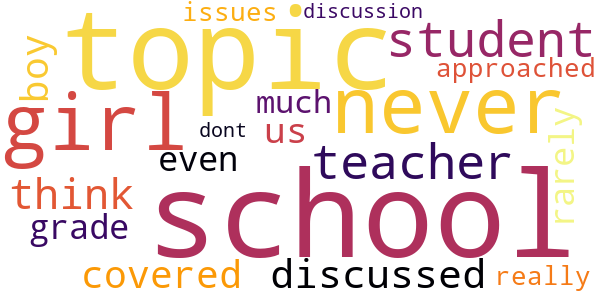

In [153]:
# Define a word cloud variable
cloud = WordCloud(background_color = "white", 
                  max_words = 20, 
                  contour_width = 5, 
                  width = 600, height = 300, 
                  random_state = 5, colormap= 'inferno')

# Process the word cloud
cloud.generate(unique_string)

# Visualize!
#cloud.to_file('WordCloud.png')
cloud.to_image()

#### BARPLOT

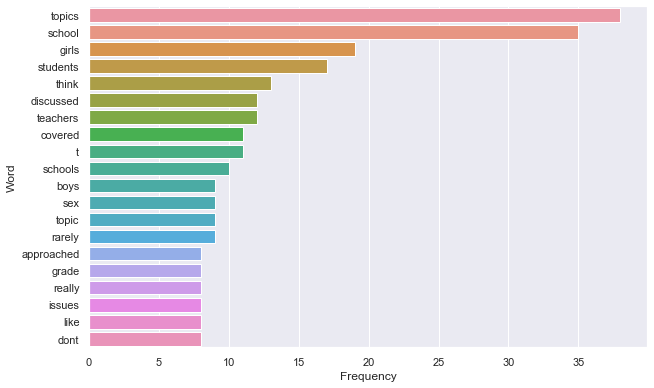

In [178]:
sns.set(rc={'figure.figsize':(10,6.27)})
hr_barplot = sns.barplot(x = "Frequency", 
                         y = "Word", 
                         data = stop_df, 
                         orient = "h")
#plt.savefig('Frequency of Words Barplot.png', dpi = 180, bbox_inches='tight')

### Fitting our Topic Model

In [31]:
# How many topics?
n_topics = 5 
#Last time I tried, 10 was too much

In [32]:
# TfidfVectorizer to create the DTM
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90,
                                   max_features = 5000,
                                   stop_words = "english")

# Fit
tfidf = tfidf_vectorizer.fit_transform(copy)

In [33]:
# Instantiate our LDA model
lda = LatentDirichletAllocation(n_components = n_topics, 
                                max_iter = 20, 
                                random_state = 5)
lda = lda.fit(tfidf)

In [34]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
print()

#### TOPIC EXTRACTION 

In [35]:
# Return the topics
tf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 20)


Topic #0:
school girls teachers really education health addressed spoken certain way taught pretty repercussions importance deemed financial mentality separate discrimination held

Topic #1:
students covered schools boys grade like approached discuss mental actually sports level class different touched seminars freely didnt menstruation care

Topic #2:
discussed sex topic rarely people discussions lot sexual went team surface allowed related considered teaching talked taboo time planning effort

Topic #3:
important teacher environment feel talking college weren used curriculum terms life faced sure good conducted roles believe religious opposed studied

Topic #4:
topics think dont issues things gender werent tried institution know problems open sessions given generally definitely wore explained interested mumbai


#### VISUALISATION & MULTIDIMENSIONAL SCALING (PCA)

In [36]:
panel = pyLDAvis.sklearn.prepare(lda_model = lda, 
                                 dtm = tfidf, 
                                 vectorizer = tfidf_vectorizer, 
                                 mds = "PCoA")
pyLDAvis.display(panel)

## Contextual Similarity using Word2Vec

In [37]:
# First, store the documents we want to explore in a separate dataframe with just one column
w2v_df = pd.DataFrame({'Processed': survey["Text processed"]})
#w2v_df

In [38]:
# Turn the text of each row into a list
# We now have a list of lists - one for each document
split_rows = [row.split() for row in w2v_df['Processed']]
#split_rows

In [39]:
no_stop = []
for response in split_rows:
    no_stop.append([word for word in response if word not in stop])
#no_stop

### Define Model

In [81]:
# Define the word2vec model
model = gensim.models.Word2Vec(no_stop, 
                               min_count = 2,
                               size = 12, 
                               workers = 1, 
                               window = 3, 
                               sg = 0)


In [82]:
# Save the vocabulary 
words = list(model.wv.vocab)

### Some Interesting Insights

In [83]:
model["sex"]

array([-0.01891383, -0.00060343,  0.01430162, -0.00569387, -0.04320076,
       -0.01524962,  0.00764656,  0.032173  ,  0.01158942,  0.01291718,
        0.01390693,  0.00290793], dtype=float32)

#### Comparing Similarities

In [84]:
model.similarity("sex", "discussed")

-0.21584184

#### "Most Similar To"

In [85]:
model.wv.most_similar(negative = ["discussed", "topics", "sex"])

[('etc', 0.7748191356658936),
 ('life', 0.7658311128616333),
 ('severe', 0.6944396495819092),
 ('able', 0.6773507595062256),
 ('talk', 0.6395411491394043),
 ('short', 0.5982902646064758),
 ('somewhat', 0.5627744793891907),
 ('fact', 0.5550074577331543),
 ('shirtless', 0.5437594652175903),
 ('convey', 0.5436224341392517)]

In [86]:
model.wv.most_similar(negative = ["biology","sex"])

[('seminars', 0.6415602564811707),
 ('prevent', 0.6190016269683838),
 ('bad', 0.5808960199356079),
 ('utmost', 0.5260583162307739),
 ('equality', 0.5200580358505249),
 ('identity', 0.5181605815887451),
 ('wearing', 0.5000048875808716),
 ('points', 0.492266982793808),
 ('open', 0.4865279197692871),
 ('werent', 0.4704514145851135)]

In [87]:
model.wv.most_similar(negative = ["girls", "school", "sex"])

[('prevent', 0.6439531445503235),
 ('don’t', 0.6141471266746521),
 ('short', 0.5927684903144836),
 ('somewhat', 0.5725463628768921),
 ('fact', 0.5586918592453003),
 ('life', 0.5498248934745789),
 ('staff', 0.510901689529419),
 ('students', 0.5103955268859863),
 ('convey', 0.4767368733882904),
 ('spoke', 0.4676302671432495)]

In [88]:
model.wv.most_similar(negative = ["consensual", "sex", "taboo"])

[('tried', 0.6713161468505859),
 ('wearing', 0.6617951393127441),
 ('disciplinary', 0.5646410584449768),
 ('touched', 0.5630807876586914),
 ('werent', 0.5564318895339966),
 ('generally', 0.5551655292510986),
 ('staff', 0.5480300188064575),
 ('identity', 0.5454975962638855),
 ('lectures', 0.5393607020378113),
 ('uncomfortable', 0.49448317289352417)]

In [48]:
# Save the word2vec vocab
features = model[model.wv.vocab]

### Visualization and Multidimensional Scaling (TSNE)

In [187]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(13, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                    va='bottom')

    #plt.savefig('TSNE Word2vec Plot.png', dpi = 180, bbox_inches='tight')
    plt.show()


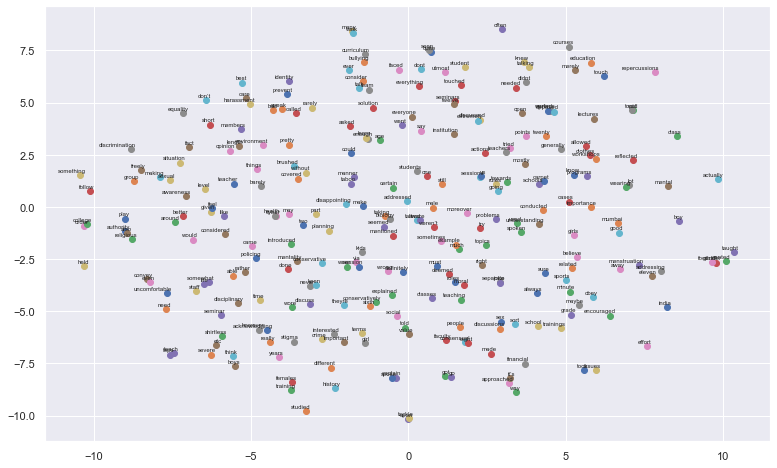

In [188]:
tsne_plot(model)

### PCA??

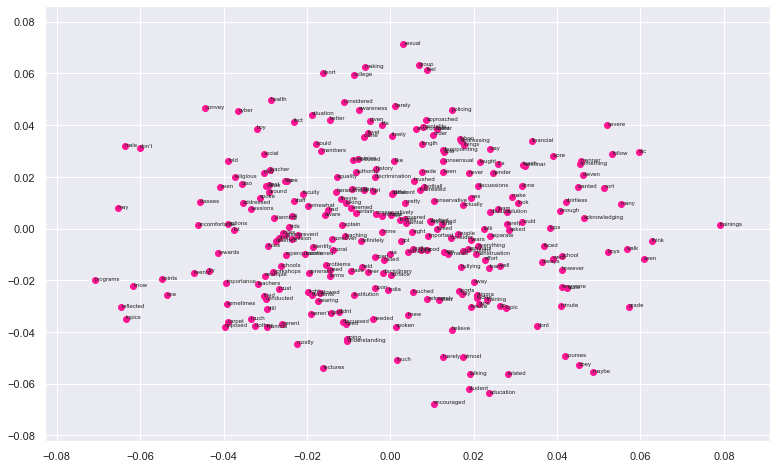

In [189]:
# Define parameters of our PCA

# Just look at the first two dimensions - the X and Y axes

for_pca = PCA(n_components = 2)
pca_out = for_pca.fit_transform(features)
plt.rcParams.update({'font.size': 6})
plt.rcParams.update({'figure.figsize':(13,8)})
vocab = list(model.wv.vocab)
X = model[vocab]
for_pca = PCA(n_components = 2)
pca_out = for_pca.fit_transform(features)
df = pd.DataFrame(pca_out, index=vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], color = 'deeppink')
for word, pos in df.iterrows():
    ax.annotate(word, pos)
#plt.savefig('PCA Word2vec Plot.png', dpi = 180, bbox_inches='tight')